In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
data = pd.read_csv('가리비류.csv')
data['ds'] = pd.to_datetime(data['기간'])  # 'ds' 컬럼을 날짜 형식으로 변환
data.rename(columns={'단가': 'y'}, inplace=True)  # 종속 변수 컬럼 이름을 'y'로 변경

In [3]:
model1 = Prophet(seasonality_prior_scale=1)
model1.fit(data)

22:58:15 - cmdstanpy - INFO - Chain [1] start processing
22:58:15 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
future = model1.make_future_dataframe(periods=12, freq='M')  # 향후 12개월의 날짜 생성
forecast = model1.predict(future)

In [5]:
forecast['yhat'] = forecast['yhat'].apply(lambda x: max(0, x))

In [6]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
25,2023-02-28,5410.139476,3667.372107,7037.692774
26,2023-03-31,8586.634612,7046.083522,10174.021647
27,2023-04-30,6982.488397,5410.059224,8658.116769
28,2023-05-31,7906.621797,6330.774912,9466.364016
29,2023-06-30,8924.204532,7346.006737,10554.272842
30,2023-07-31,14336.591633,12814.306854,15931.000180
31,2023-08-31,0.000000,-5101.232747,-1827.283888
32,2023-09-30,5616.226811,4002.617460,7169.783309
33,2023-10-31,3475.537474,1871.418009,5000.632511
34,2023-11-30,13929.099166,12391.221674,15457.005238


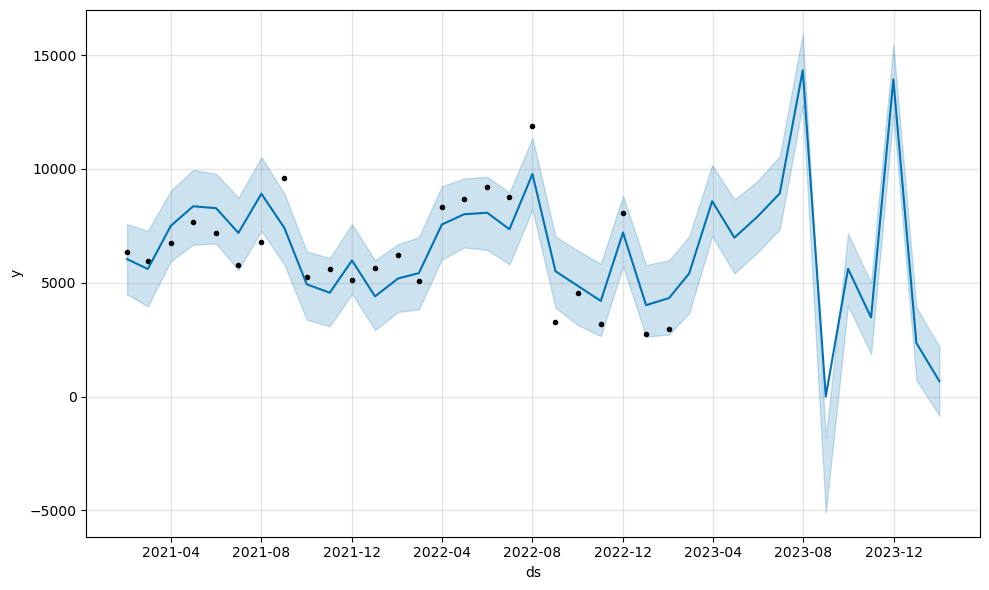

In [7]:
fig1 = model1.plot(forecast)

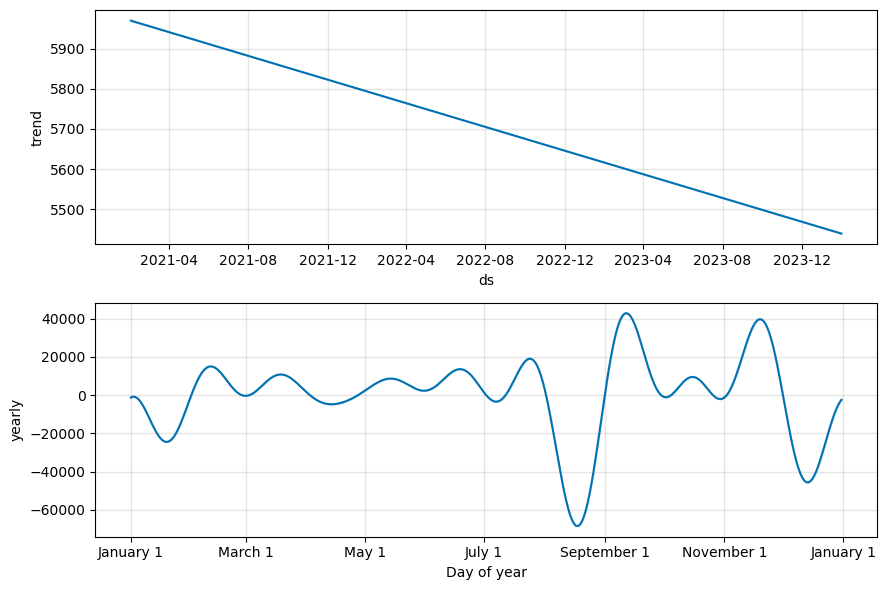

In [8]:
fig2 = model1.plot_components(forecast)

In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [23]:
data = pd.read_csv('가리비류.csv')

In [24]:
quantity = data['물량-평균'].values
price = data['단가'].values

In [25]:
model = LinearRegression()
model.fit(quantity.reshape(-1, 1), price)

LinearRegression()

In [26]:
print("물량과 가격 분석 결과:")
print("기울기 (회귀 계수):", model.coef_[0])
print("절편 (절편 값):", model.intercept_)

물량과 가격 분석 결과:
기울기 (회귀 계수): -27.967385239244898
절편 (절편 값): 8032.253131094378


In [27]:
future_quantity = 50 # 예측할 물량
predicted_price = model.predict([[future_quantity]])

In [28]:
print("물량에 따른 예측 가격:")
print("물량:", future_quantity)
print("예측 가격:", predicted_price[0])

물량에 따른 예측 가격:
물량: 50
예측 가격: 6633.8838691321325
